# Equity Risk Premium

The Fama-French 5-factor [data-set](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_5_factors_2x3.html) has the Rm-Rf field denoting the market's excess return over the risk-free rate.

Cumulative excess returns over different rolling windows (5, 10, 20 yrs) should give us an idea of how equity investors have been compensated for the additional risk that they took.

Documentation for the Fama-French data-set on pluto: [python](https://plutopy.readthedocs.io/en/latest/FamaFrench.html), [R](https://shyams80.github.io/plutoR/docs/reference/FamaFrench-class.html)

In [1]:
library(tidyverse)
library(ggthemes)
library(odbc)
library(plutoR)
library(quantmod)
library(PerformanceAnalytics)

options("scipen"=999)
options(stringsAsFactors = FALSE)
options(repr.plot.width=16, repr.plot.height=8)

source("config.R")
source("goofy/plot.common.R")

#initialize
famaFrench <- FamaFrench()

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last

Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.

Attaching package: ‘PerformanceAnalytics’

The following object is masked from

In [2]:
dailyExs <- famaFrench$FiveFactor3x2Daily() %>%
    filter(KEY_ID == 'MKT-RF') %>%
    select(TIME_STAMP, RET) %>%
    collect()
    
dailyExsXts <- xts(dailyExs$RET/100, dailyExs$TIME_STAMP)

print("Excess Returns: ")
print(head(dailyExsXts))
print(tail(dailyExsXts))

[1] "Excess Returns: "
              [,1]
1963-07-01 -0.0067
1963-07-02  0.0079
1963-07-03  0.0063
1963-07-05  0.0040
1963-07-08 -0.0063
1963-07-09  0.0045
              [,1]
2019-06-21 -0.0021
2019-06-24 -0.0034
2019-06-25 -0.0098
2019-06-26 -0.0006
2019-06-27  0.0060
2019-06-28  0.0068


In [3]:
plotRollingReturns <- function(numYears, retXts){
    numPer <- 220 * numYears
    retUnits <- "days"
    
    rollRet <- rollapply(retXts, numPer, Return.cumulative)
    rollRet <- 100*na.omit(rollRet)
    names(rollRet) <- c('RET')
    
    rollRetDf <- data.frame(rollRet)
    rollRetDf$T <- index(rollRet)

    firstDate <- first(index(rollRet))
    lastDate <- last(index(rollRet))
    xAxisTicks <- seq(from=firstDate, to=lastDate, length.out=10)

    ggplot(rollRetDf, aes(x=T, y=RET)) +
        theme_economist() +
        geom_line() +
        scale_x_date(breaks = xAxisTicks) +
        labs(x='', y='cumulative return (%)', color='', 
             title=sprintf("Excess %d-year Rolling Returns (%s)", numYears, retUnits), 
             subtitle=sprintf("[%s:%s]", firstDate, lastDate)) +
        annotate("text", x=lastDate, y=min(rollRetDf$RET, na.rm=T), label = "@StockViz", 
                 hjust=1.1, vjust=-1.1, col="white", cex=6, fontface = "bold", alpha = 0.8)
}

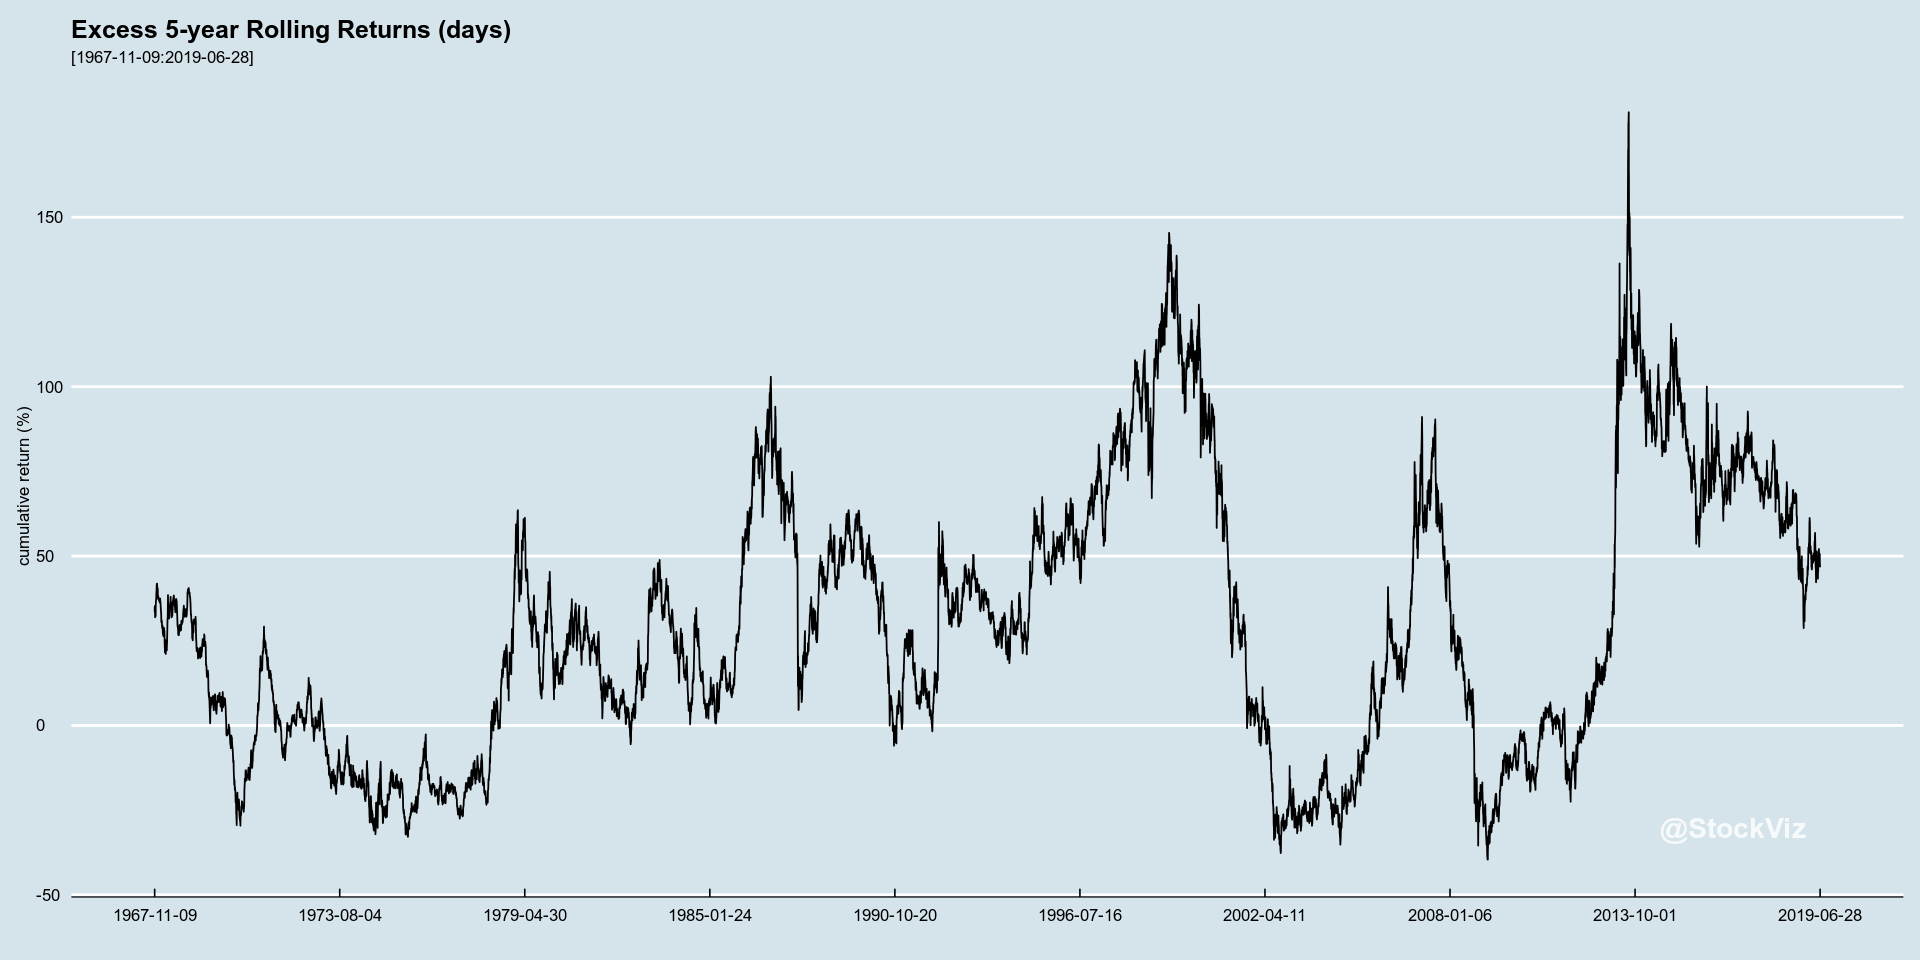

In [4]:
#5-year rolling returns
plotRollingReturns(5, dailyExsXts)

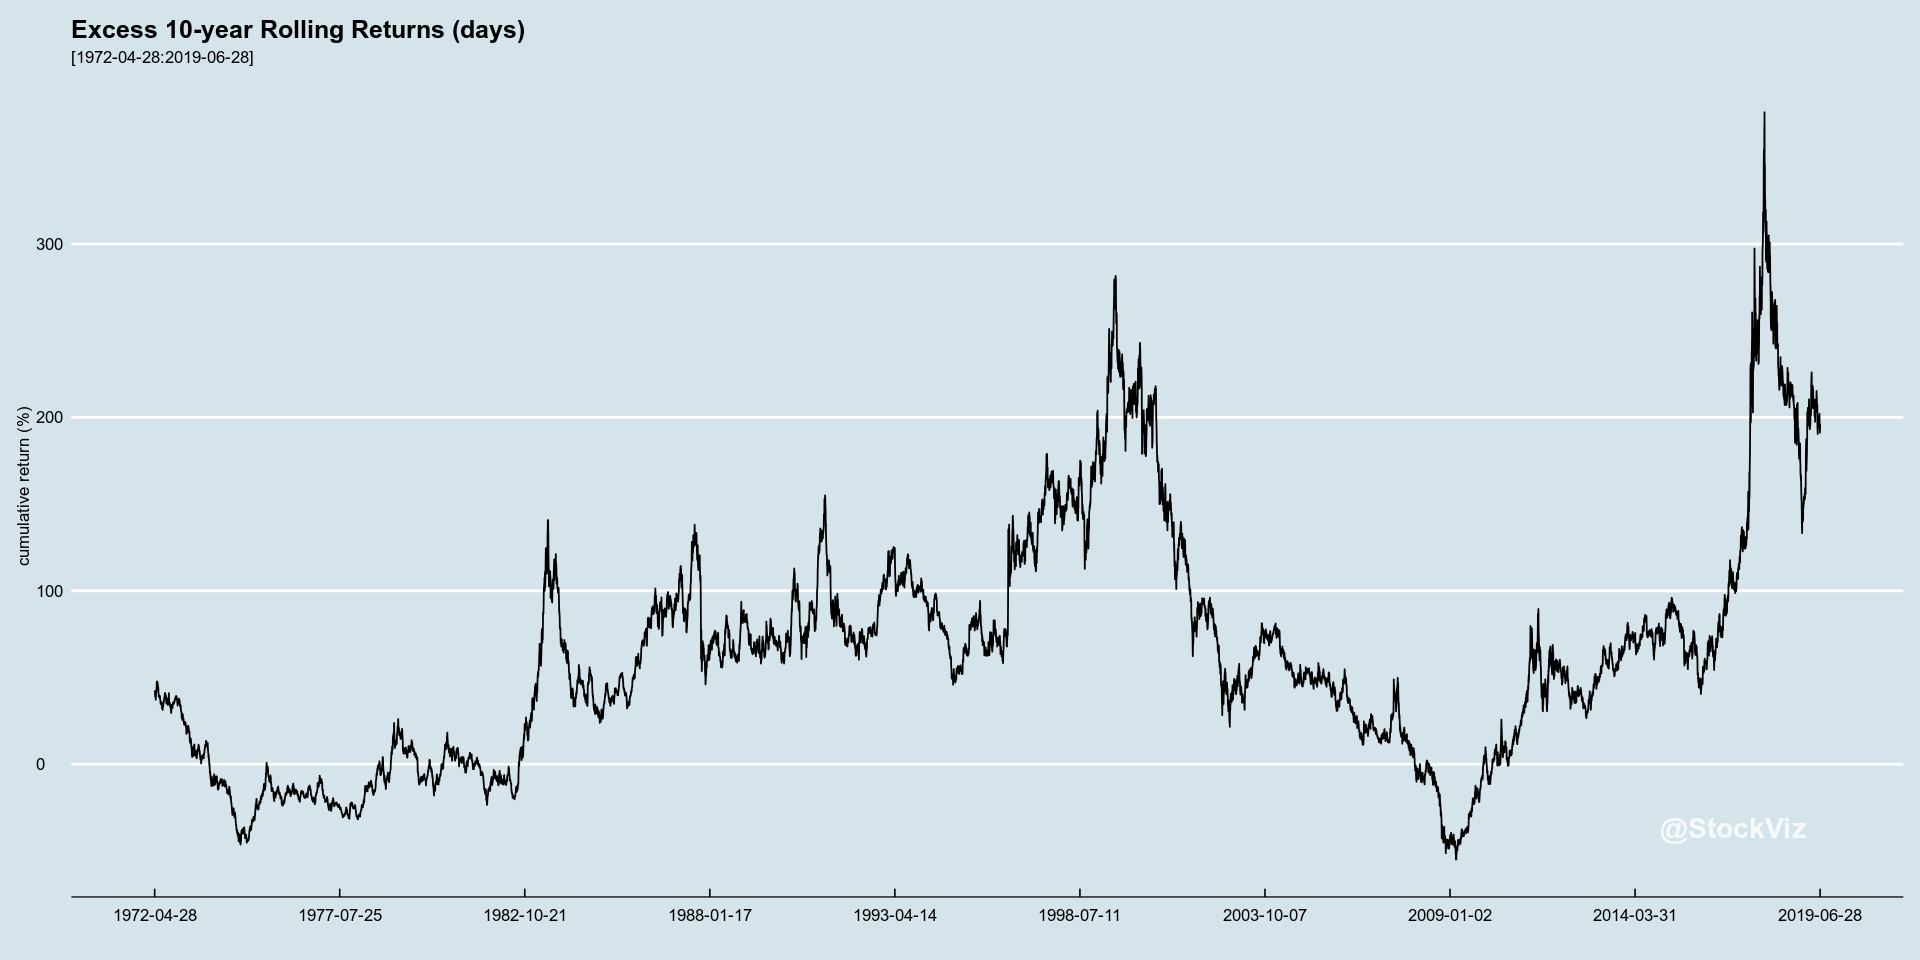

In [5]:
#10-year rolling returns
plotRollingReturns(10, dailyExsXts)

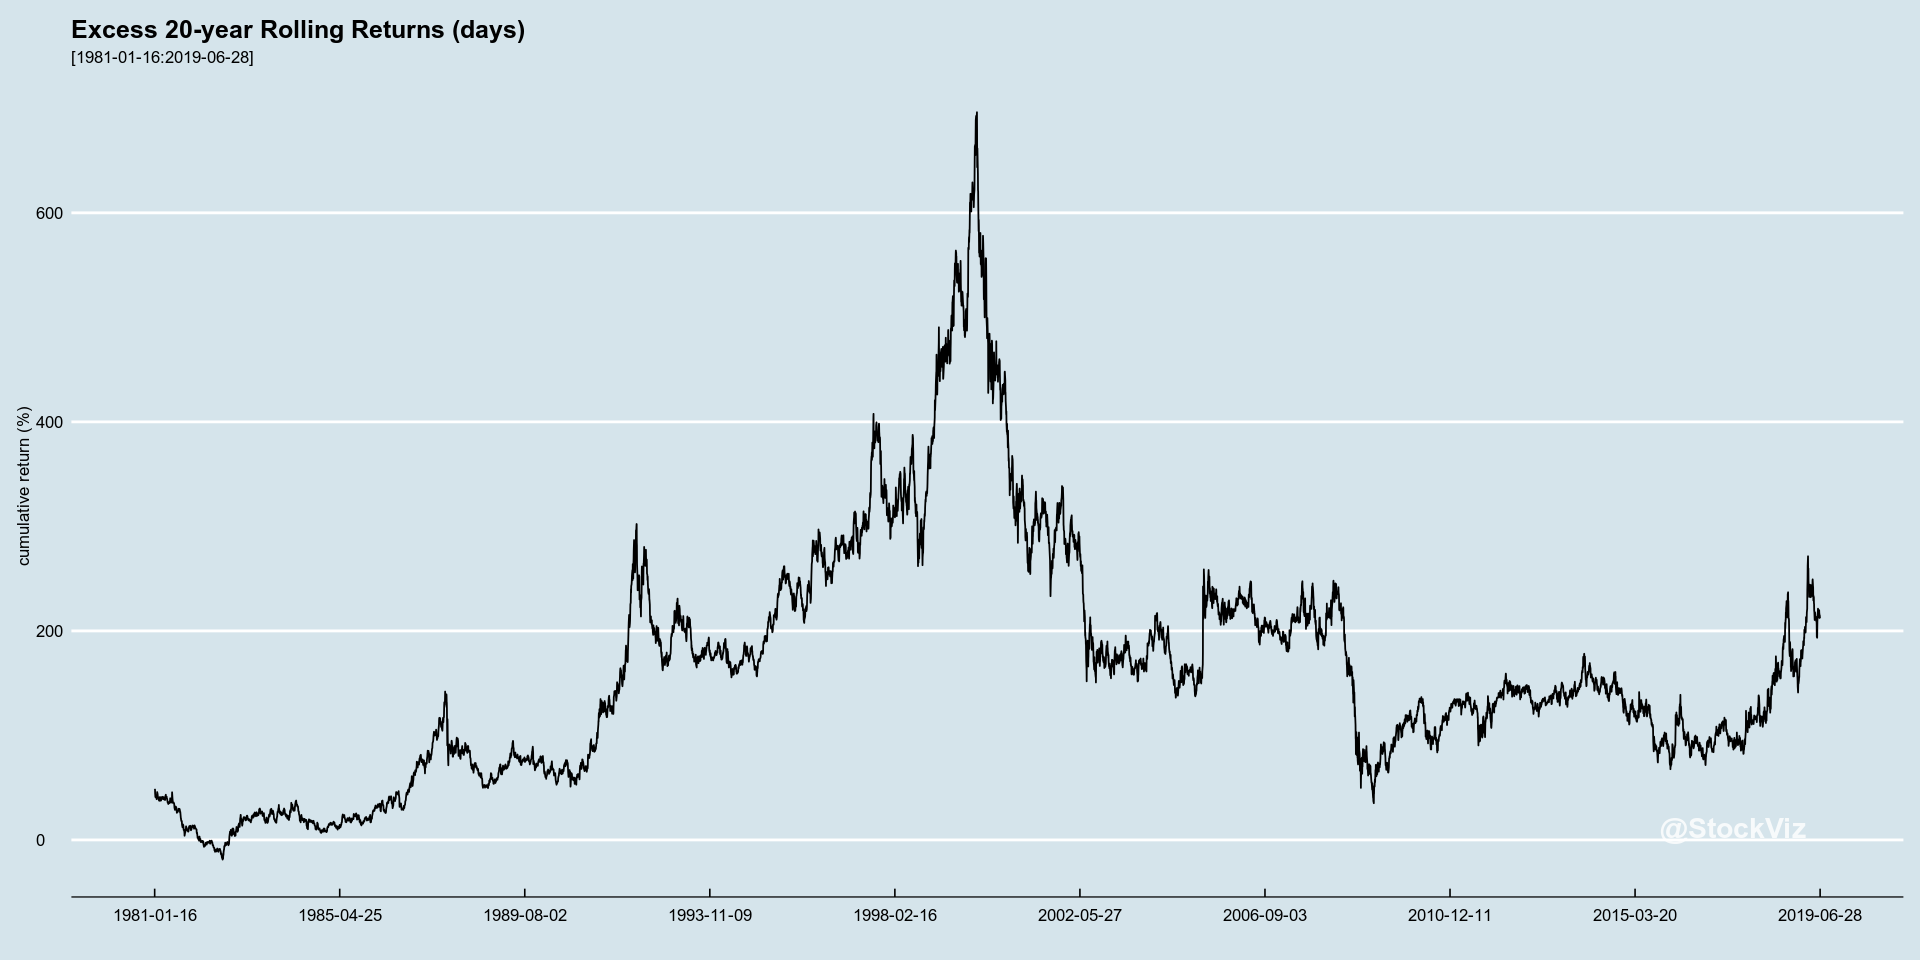

In [6]:
#20-year rolling returns
plotRollingReturns(20, dailyExsXts)

This notebook was created using [pluto](http://pluto.studio). Learn more [here](https://github.com/shyams80/pluto)